# Movie Genre Classification

# TEXT Project DeepLearning

Integrantes:
Angela María Arias Rojas 201728551 - Raúl Andrés Pardo Moreno 201727367

# KAGGLE TEAM: RA

# PART 1. Machine Learning Algorithm

# i. Reading data.

Firstly, we upload the python modules and training and test text data from the available files:

In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [2]:
### Personal path where the files are uploaded from.
path = 'C:/AAndres/Maestria Analytics/Semestre Vacaciones/Deep Learning/1 Class/AppliedDeepLearningClass-master/finalProject'

In [3]:
dataTraining = pd.read_csv(os.path.join(path, 'data', 'dataTraining.csv'), encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv(os.path.join(path, 'data', 'dataTesting.csv'), encoding='UTF-8', index_col=0)

In [4]:
dataTraining.shape, dataTesting.shape

((7895, 5), (3383, 3))

In [5]:
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [6]:
dataTesting.head()

,year,title,plot
1,1999,Message in a Bottle,"who meets by fate , shall be sealed by fate ...."
4,1978,Midnight Express,"the true story of billy hayes , an american c..."
5,1996,Primal Fear,martin vail left the chicago da ' s office to ...
6,1950,Crisis,husband and wife americans dr . eugene and mr...
7,1959,The Tingler,the coroner and scientist dr . warren chapin ...


Now, we join the two dataframes ('dataTraining' and 'dataTesting') in order to apply CountVectorizer and get the X predictor variable ready to use it. Then, we split it again.

In [7]:
full_data=[dataTraining.iloc[:,0:3],dataTesting]
full_data=pd.concat(full_data)
full_data.shape

(11278, 3)

# Apply CountVectorizer.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
x_vector=CountVectorizer(max_features=9500) #(ngram_range=(1,2),max_features=9500)
X_input=x_vector.fit_transform(full_data['plot'])
X_input.shape

(11278, 9500)

# Splitting data into training and text.

In [11]:
X_input_train=X_input[0:7895,:]
X_input_test=X_input[7895:,:]
X_input_train.shape, X_input_test.shape

((7895, 9500), (3383, 9500))

# ii. Setting Up the variable 'Y'.

In [12]:
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))

le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])
y_genres.shape

(7895, 24)

In [13]:
print(y_genres[0:10,:])

[[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]]


# a) Machine Learning Algorithm.

# ML- Gradient Boosting.

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier

model_gb=OneVsRestClassifier(GradientBoostingClassifier(n_estimators=370, learning_rate=0.08,max_depth=2,random_state=0))
model_gb.fit(X_input_train,y_genres)

KeyboardInterrupt: 

After testing different parameters, it was found that the number of estimators between 300 and 400 provided the best model accuracy in a sample of 4.000 images. Regarding learning rate, it seems that does not affect the accuracy too much, but values under 0.1 were more consistent.

In [27]:
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

y_pred_gb1 = model_gb.predict_proba(X_input_test)

pd.DataFrame(y_pred_gb1, index=dataTesting.index, columns=cols).to_csv('pred_gb_010.csv', index_label='ID')

# PART 2.  

# a) CNN algorithm.

# Model CNN 1

In [22]:
from keras.layers import Dense,Dropout, Activation, Flatten, BatchNormalization
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.callbacks import History
from livelossplot import PlotLossesKeras

In [30]:
model1=Sequential()
model1.add(Dense(528,activation='relu',input_shape=((X_input_train.shape)[1],)))
model1.add(Dropout(0.2))
model1.add(BatchNormalization())
model1.add(Dense(24,activation='sigmoid'))
model1.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

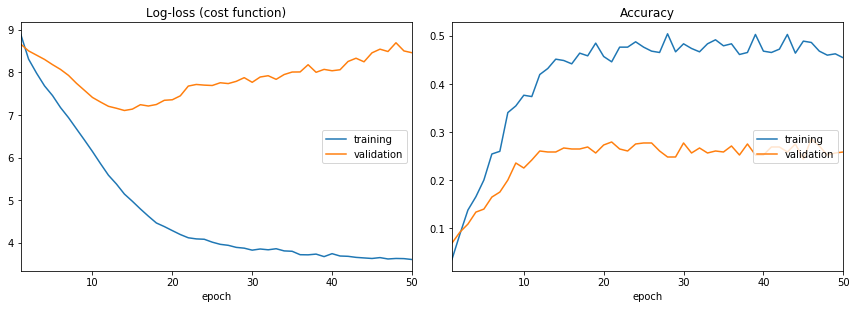

In [19]:
h=History()
model1.fit(X_input_train[0:1200,:],y_genres[0:1200,:],batch_size=40,epochs=50,verbose=0,callbacks=[h,PlotLossesKeras()],validation_split=0.4)

In [31]:
model1.fit(X_input_train,y_genres,batch_size=40,epochs=25,verbose=1)

Epoch 1/25
7895/7895 [==============================] - 16s 2ms/step - loss: 7.1811 - acc: 0.2690
Epoch 2/25
7895/7895 [==============================] - 16s 2ms/step - loss: 5.0211 - acc: 0.3857
Epoch 3/25
7895/7895 [==============================] - 16s 2ms/step - loss: 4.1892 - acc: 0.4141
Epoch 4/25
7895/7895 [==============================] - 16s 2ms/step - loss: 3.8051 - acc: 0.4358
Epoch 5/25
7895/7895 [==============================] - 16s 2ms/step - loss: 3.5994 - acc: 0.4512
Epoch 6/25
7895/7895 [==============================] - 16s 2ms/step - loss: 3.4763 - acc: 0.4580
Epoch 7/25
7895/7895 [==============================] - 16s 2ms/step - loss: 3.4066 - acc: 0.4657
Epoch 8/25
7895/7895 [==============================] - 16s 2ms/step - loss: 3.3439 - acc: 0.4668
Epoch 9/25
7895/7895 [==============================] - 16s 2ms/step - loss: 3.3001 - acc: 0.4685
Epoch 10/25
7895/7895 [==============================] - 16s 2ms/step - loss: 3.2840 - acc: 0.4716
Epoch 11/25
7895/78

In [32]:

cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

y_pred_test_genres = model1.predict_proba(X_input_test)

pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols).to_csv('prediction_cnn03.csv', index_label='ID')

# Model CNN 2

In [21]:
X_input_train.shape, X_input_test.shape

((7895, 9500), (3383, 9500))

In [20]:

from keras.layers.embeddings import Embedding

model2=Sequential()
model2.add(Embedding(7895,32,input_length=9500))
model2.add(Flatten())
model2.add(Dense(256,activation='relu')) #,input_shape=((X_input_train.shape)[1],)))
model2.add(Dense(24,activation='sigmoid'))
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
model2.fit(X_input_train,y_genres,batch_size=50,epochs=15,verbose=1)
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

y_nwt32 = model2.predict_proba(X_input_test)

pd.DataFrame(y_nwt32, index=dataTesting.index, columns=cols).to_csv('prednwt34.csv', index_label='ID')


Epoch 1/15
 850/7895 [==>...........................] - ETA: 4:08 - loss: 9.8665 - acc: 0.165

KeyboardInterrupt: 

# Model CNN 3

In [33]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

model3=Sequential()
model3.add(Embedding(7895,7895,input_length=9500))
model3.add(Conv1D(filters=32,kernel_size=32,padding='same',activation='relu'))
model3.add(MaxPooling1D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(250,activation='softmax')) 
model3.add(Dense(24,activation='sigmoid'))
model3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

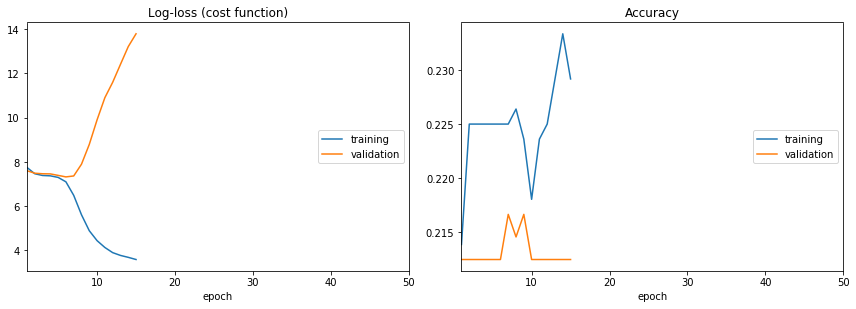

KeyboardInterrupt: 

In [35]:
### This part of the code was for finding the best parameters in a small sample.
h=History()
model2.fit(X_input_train[0:1200,:],y_genres[0:1200,:],batch_size=40,epochs=50,verbose=0,callbacks=[h,PlotLossesKeras()],validation_split=0.4)

In [ ]:
model3.fit(X_input_train,y_genres,batch_size=60,epochs=10,verbose=1)
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

y_nwt5 = model3.predict_proba(X_input_test)

pd.DataFrame(y_nwt5, index=dataTesting.index, columns=cols).to_csv('prednwt5.csv', index_label='ID')


Epoch 1/10


# b) Recurrent Neural Network RNN

Import the required modules.

In [29]:
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
import keras
from keras import backend as K
print(K.tensorflow_backend._get_available_gpus())

[]


In [30]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [31]:
from livelossplot import PlotLossesKeras
%matplotlib inline

Checking X shape:

# Setting Up the RNN model:

First, the data input 'X' variable is reshape.

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
x_vector2=CountVectorizer(ngram_range=(1,2),max_features=5000)
X_input2=x_vector2.fit_transform(full_data['plot'])
X_input2.shape

(11278, 5000)

'X' variable is splitted into training and test.

In [36]:
X_input_train2=X_input2[0:7895,:]
X_input_test2=X_input2[7895:,:]
X_input_train2.shape, X_input_test2.shape

((7895, 5000), (3383, 5000))

In [37]:
model_rnn = Sequential()
model_rnn.add(Embedding(9500,X_input_train2.shape[0], input_length=X_input_train2.shape[1]))
model_rnn.add(LSTM(32))
model_rnn.add(Dropout(0.38))
model_rnn.add(Dense(24, activation='sigmoid'))
model_rnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_rnn.summary()        

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 5000, 7895)        75002500  
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                1014784   
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 24)                792       
Total params: 76,018,076
Trainable params: 76,018,076
Non-trainable params: 0
_________________________________________________________________


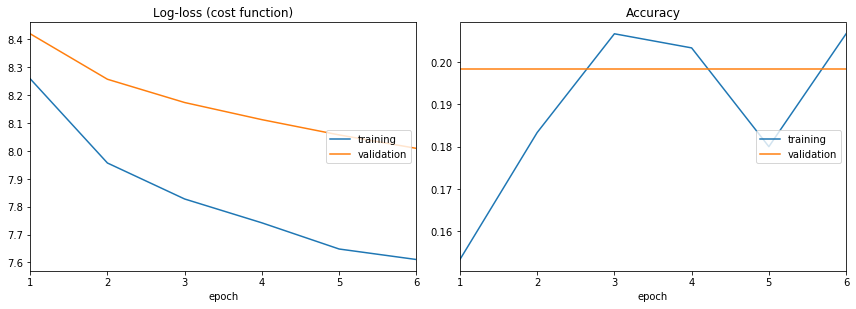

In [47]:
model_rnn.fit(X_input_train2[0:300,:], y_genres[0:300,:], validation_data=[X_input_train2[5001:5500,:], y_genres[5001:5500,:]], 
          batch_size=150, epochs=6, verbose=0,
          callbacks=[PlotLossesKeras()])

In [ ]:
model_rnn.fit(X_input_train2,y_genres,batch_size=60,epochs=3,verbose=1)

Epoch 1/3


In [ ]:

cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

y_pred_rnn = model_rnn.predict_proba(X_input_test2)

pd.DataFrame(y_pred_rnn, index=dataTesting.index, columns=cols).to_csv('pred_rnntxt1.csv', index_label='ID')

# Note:

We run Recurrent Neural Network with just 300 samples in order to know if the model work well. Unfortunately, it was not possible to run it with all the data because of computer capacity. So many parameters make this model difficult to work on.

We did not want to reduce the dimensionality because the loss of information, so for academic purposes we use just 300 observations to run this model.

# Conclusions:

In order to get the best predictions, first, we were focus on how to extract the best information from the predictor (text) while we re-shape it for its usage in the models.

The next step was to select the model that provides the best performance so we could work on it exclusively. It happens with CNN. This model gave us the best score in kaggle. 